In [1]:
import numpy as np
import math as m
import cython
%load_ext Cython

In [2]:
import time
start_time = time.time()
np.random.seed(1)
def sim_stocks(S0, r,sigma,steps =252,T=5):
    nSims = 10000
    sim_steps = steps*T
    dt = 1/steps
    div = 0
    mu = (r-div-0.5*sigma*sigma)*dt
    sigma = sigma*m.sqrt(dt)
    St = np.zeros(shape=(sim_steps,nSims))
    St[0,] = S0
    for i in range(1,sim_steps):
            for j in range(0,nSims):
                e = np.random.randn(1)
                St[i,j] = St[i-1,j]*m.exp(mu+sigma*e)
    return(St)

sim_stocks = np.vectorize(sim_stocks)
sim_stocks = sim_stocks(100,0.03,sigma=0.3,steps = 252,T=5)
print("The normal numpy execution with vectorization takes {0} seconds ".format(time.time() - start_time))

The normal numpy execution with vectorization takes 405.5124304294586 seconds 


In [3]:
%%cython
import time
start_time = time.time()
cdef extern from "math.h":
    double sqrt(double x)
    double exp(double x)
import numpy as np
cimport numpy as np
# cimport math as m
cdef double S0
cdef double r
cdef double sigma
cdef int steps
cdef int T
np.random.seed(1)
cpdef sim_stocks(S0, r,sigma,steps =252,T=5):
    cdef int nSims = 10000
    cdef int sim_steps = steps*T
    cdef double dt = 1/steps
    cdef int div = 0
    cdef double mu = (r-div-0.5*sigma*sigma)*dt
    sigma = sigma*sqrt(dt)
    St = np.zeros(shape=(sim_steps,nSims))
    St[0,] = S0
    for i in range(1,sim_steps):
            for j in range(0,nSims):
                e = np.random.randn(1)
                St[i,j] = St[i-1,j]*exp(mu+sigma*e)
    return(St)

sim_stocks = sim_stocks(100,0.03,sigma=0.3,steps = 252,T=5)
print("The cythonized execution takes {0} seconds ".format(time.time() - start_time))

The cythonized execution takes 124.2972629070282 seconds 


In [4]:
import pandas as pd
pd.DataFrame(sim_stocks).head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,103.111188,98.844663,99.000921,97.986867,101.642863,95.738036,103.346199,98.565885,100.598760,99.523919,...,103.699093,99.893445,98.481905,99.245501,98.920391,100.132013,100.922594,98.095858,99.875640,97.313476
2,102.866686,99.265893,98.338115,96.455133,101.136559,96.039219,104.664004,97.952449,100.014062,100.510028,...,104.448078,98.353791,94.600402,96.608331,101.010530,98.357123,102.419466,102.657761,101.549805,97.124704
3,99.173535,98.959506,96.797841,96.074438,103.111048,97.810087,104.210140,97.742475,98.879160,102.681434,...,106.120479,94.650093,94.530725,94.330246,103.120147,99.641814,103.488922,102.489138,99.110295,97.749231
4,99.893780,98.024566,99.174160,95.431390,107.569147,102.923968,106.053757,96.861283,97.855577,101.779097,...,106.819682,94.759727,95.984286,94.002232,100.414456,100.251454,106.379650,104.895380,100.354540,97.822446


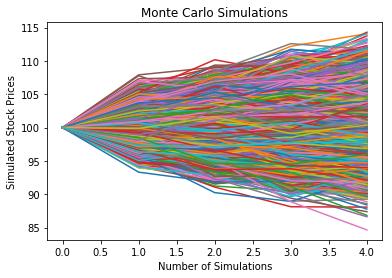

In [5]:
import matplotlib.pyplot as plt
plt.plot(pd.DataFrame(sim_stocks).head())
plt.title("Monte Carlo Simulations")
plt.xlabel("Number of Simulations")
plt.ylabel("Simulated Stock Prices")
plt.show()

In [6]:
S0=100
sigma=0.3
K=100
r=0.03
T=5
Nt=T*252 #number of trading days until maturity
sim_stocks = pd.DataFrame(sim_stocks)
prices = []
Y = []
steps=252
sim_steps = steps*5
for i in range(0,sim_steps):
    prices.append(np.mean(sim_stocks [i])) # Taking the arithmetic mean
    Y.append(max(prices[i]-K,0)*m.exp(-r*T))
arithmetic_opt_price  = np.mean(Y)
arithmetic_opt_price

17.726172152386773